In [1]:
%load_ext autoreload
%autoreload 2

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import utils.data as data
from tqdm.notebook import tqdm
import numpy as np
from collections import Counter


In [6]:
dataset = data.Marconi100Dataset(data.get_dataset_paths())


100%|██████████| 249/249 [00:44<00:00,  5.58it/s]


In [10]:
sequences = []
for i in tqdm(range(len(dataset))):
    df, labels = dataset[i]

    count = 0
    counting = False
    for l in labels:
        if l == 0:
            if counting:
                sequences.append(count)
                count = 0
                counting = False
        else:
            counting = True
            count += 1


  0%|          | 0/249 [00:00<?, ?it/s]

Num anomalies: 26037

min: 1
max: 5293
mean: 4.8
median: 1.0

  < 4:  24037 (92.3%)
 >= 4:   2000 (7.7%)
>= 10:    435 (1.7%)


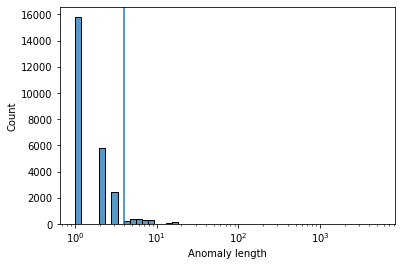

In [91]:
min_seq = min(sequences)
max_seq = max(sequences)
mean = np.mean(sequences)
median = np.median(sequences)

counter = Counter(sequences)
num_anomalies = len(sequences)

lim = 4
lt = sum(counter[i] for i in range(lim))
lt_p = lt / num_anomalies * 100
gt = num_anomalies - lt
gt_p = 100 - lt_p
gg = sum(counter[i] for i in range(10, max_seq+1))
gg_p = gg / num_anomalies * 100

ax = sns.histplot(sequences, bins=50, log_scale=True)
ax.set_xlabel("Anomaly length")
ax.axvline(lim)

print(f"Num anomalies: {num_anomalies}")
print()
print(f"min: {min_seq}")
print(f"max: {max_seq}")
print(f"mean: {mean:.1f}")
print(f"median: {median}")
print()
print(f"  < {lim}: {lt:6d} ({lt_p:.1f}%)")
print(f" >= {lim}: {gt:6d} ({gt_p:.1f}%)")
print(f">= 10: {gg:6d} ({gg_p:.1f}%)")
